
This project aims to detect bubble edges, area, eccentricity, perimeter, and centroid from an image. The first step is to set a threshold and process the image to detect the objects of interest while omitting any outliers. The detected edges are then filled to obtain the complete objects, which are labeled and analyzed using the regionprops function from the scikit-image library. The resulting properties, including area, eccentricity, perimeter, and centroid, are stored in lists. Finally, a pandas dataframe is created to store these properties and facilitate further analysis.

Importing packages we need

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import math
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology
from scipy.stats import uniform
import seaborn as sns
from PIL import Image
import skimage.io as io
from scipy import ndimage
import cv2

Converting an image to a binary image is a common preprocessing step in computer vision applications, particularly in edge detection and area calculation. This is because binary images consist of only two pixel values (typically 0 and 255), which make it easier to isolate the edges of objects and perform thresholding operations.

To demonstrate this, let's consider an example where we want to perform edge detection on an image of a flower. First, we'll load the image using the OpenCV library in Python:

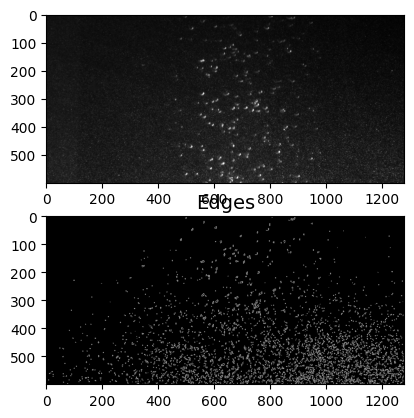

In [4]:
import cv2

img = cv2.imread("C:/Users/erfan\OneDrive\Desktop\Basler_acA1300-200um__23230239__20200528_162909234_70.tiff")

#Next, we can convert the image to grayscale using the cv2.cvtColor() function:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)



fig1, (ax1,ax2) = plt.subplots(2)
ax1.imshow(gray, cmap=plt.cm.gray)
ax2.imshow(edges, cmap=plt.cm.gray)
ax2.set_title('Edges', fontsize=14)
plt.show()

As you can see we don't detect edges with good quality and a lot of outliars are needed to be removed from our raw image. Here is a code for processing our initial image.

In [5]:
from PIL import Image

def entropy(image,ent_number):

    # Convert to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    def imhist(image):
      # calculates normalized histogram of an image
        m, n = image.shape
        h = [0.0] * 256
        for i in range(m):
            for j in range(n):
                h[image[i, j]]+=1
        return h

    histogram = imhist(image)
    histogram = histogram / np.sum(histogram)

    def calc_entropy(probs):
        return np.where(probs > 0, probs * np.log2(probs), 0)

    threshold = np.zeros(256)
    hist_forward = np.zeros(256)
    hist_backward = np.zeros(256)

    for t in range(1, 255):
        hist_forward[t] = -np.sum(calc_entropy(histogram[:t-1] / np.sum(histogram[1:t-1])))
        hist_backward[t] = -np.sum(calc_entropy(histogram[t:] / np.sum(histogram[t:])))
        threshold[t] = hist_forward[t] + hist_backward[t]

    max_threshold = np.argmax(threshold) + ent_number

    image_thresh = np.copy(image)
    image_thresh[image_thresh >= max_threshold] = 255
    image_thresh[image_thresh <  max_threshold] = 0

    process_image = Image.fromarray(image_thresh)
    return process_image

This code is defining a function called entropy that calculates the threshold of an image based on its entropy.

First, the function converts the input image to grayscale using cv2.cvtColor(). Then, it defines a function called imhist() that calculates the normalized histogram of an image. The histogram of the input grayscale image is calculated by calling this function, and then it is normalized by dividing it by the sum of the histogram values.

Next, the function defines another function called calc_entropy() that calculates the entropy of an image based on the probability distribution of the histogram. The threshold value is initialized to zero and arrays are created to hold the forward and backward entropies. A loop runs from 1 to 254 and calculates the forward and backward entropies of the histogram at each threshold value. The threshold that maximizes the sum of the forward and backward entropies is calculated and returned as max_threshold.

Finally, the input grayscale image is thresholded using the max_threshold value. Any pixel with a value greater than or equal to the threshold is set to 255, and any pixel with a value less than the threshold is set to 0. The resulting binary image is converted to a PIL Image object using Image.fromarray() and returned by the function.

C:\Users\erfan\AppData\Local\Temp\ipykernel_36576\854151777.py:21: RuntimeWarning: divide by zero encountered in log2
  return np.where(probs > 0, probs * np.log2(probs), 0)
C:\Users\erfan\AppData\Local\Temp\ipykernel_36576\854151777.py:21: RuntimeWarning: invalid value encountered in multiply
  return np.where(probs > 0, probs * np.log2(probs), 0)
C:\Users\erfan\AppData\Local\Temp\ipykernel_36576\854151777.py:28: RuntimeWarning: invalid value encountered in divide
  hist_forward[t] = -np.sum(calc_entropy(histogram[:t-1] / np.sum(histogram[1:t-1])))
C:\Users\erfan\AppData\Local\Temp\ipykernel_36576\3047387520.py:7: DeprecationWarning: Please use `morphological_gradient` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  gradient = morphology.morphological_gradient(processed_img, size=(3,3))


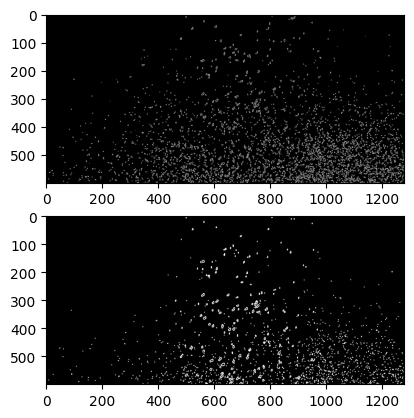

In [6]:
from skimage import data, filters, measure, morphology
from scipy.ndimage import morphology


#Next, we process our image with function that we definded:
processed_img = entropy(img,0)
gradient = morphology.morphological_gradient(processed_img, size=(3,3))

fig2, (ax3,ax4) = plt.subplots(2)
ax3.imshow(edges, cmap=plt.cm.gray)
ax4.imshow(gradient, cmap=plt.cm.gray)
plt.show()

morphological_gradient is a function from the scipy.ndimage.morphology module that calculates the morphological gradient of an image. The morphological gradient of an image is defined as the difference between the dilation and erosion of the image. In other words, it measures the difference in intensity values between the edges of objects in the image and their interiors.

To demonstrate the use of morphological_gradient, let's consider a simple example. Suppose we have an image of a black square on a white background: 
00000000
00001110
00001010
00001110
00000000

If we apply the dilation operation to this image using a 3x3 kernel, we get the following image:
00001110
00001110
00001110
00001110
00001110

The morphological gradient of the original image is then calculated by subtracting the erosion from the dilation:
00001110
00000110
00000110
00000110
00001110

As you can see, the morphological gradient image highlights the edges of the square, while suppressing the interior regions. This can be useful for edge detection, as it allows us to isolate the boundaries between objects in the image. In comparison to other edge detection methods such as the Canny edge detector, the morphological gradient method is relatively simple and can be more robust in situations where the edges are not well-defined or there is significant noise in the image.

In practice, the morphological_gradient function can be applied to grayscale or binary images using a variety of kernel sizes and shapes. The choice of kernel size and shape will depend on the specific requirements of the task, such as the size and orientation of the edges to be detected.

In [7]:
from scipy import ndimage

filled_edges = ndimage.binary_fill_holes(gradient)

labels = measure.label(filled_edges) 
fig = px.imshow(filled_edges, binary_string=True)  
fig.update_traces(hoverinfo='skip')  # hover is only for label info
props = measure.regionprops(labels)
area = [prop.area for prop in props]
diameter = np.sqrt(np.multiply(4, area) / math.pi)
diameter = np.sort(diameter)
properties = ['area', 'eccentricity', 'perimeter', 'centroid']

AREA = []
DIAMETER = []
CENTROID = []
X = []
Y = []

for index in range(0, len(props)):
    label_i = props[index].label
    centroid = props[index].centroid[::-1]  # reverse order of coordinates to match contour
    X.append(centroid[0])
    Y.append(centroid[1])

AREA.extend(area)
DIAMETER.extend(diameter)
print(DIAMETER)
DATA = pd.DataFrame(X)
DATA['Y'] = Y
DATA['Diameter'] = DIAMETER[:]
DATA['Area'] = AREA[:]
DATA.columns = ['X', 'Y', 'Diameter', 'Area']



[2.763953195770684, 2.763953195770684, 2.763953195770684, 2.763953195770684, 2.763953195770684, 2.763953195770684, 2.763953195770684, 2.763953195770684, 3.1915382432114616, 3.1915382432114616, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.385137501286538, 3.3851375

The ndimage.binary_fill_holes function is used to fill holes inside a binary mask image gradient and create a new image called filled_edges.

Then, measure.label function is used to label connected regions of filled_edges with different integer values. The labeled image is stored in labels.

Next, the code creates a plotly.express.imshow object called fig with the filled_edges image data. The binary_string=True parameter specifies that the image should be treated as binary (only containing black and white pixels). The fig.update_traces method is used to skip displaying hover information when the user hovers over the image.

The measure.regionprops function is used to extract properties of labeled regions in the labels image, such as area, eccentricity, perimeter, and centroid. These properties are stored in a list of RegionProperties objects called props.

The code then calculates the diameter of each region using the area of each region, which is stored in area. The diameter values are sorted and stored in the diameter list.

The code then initializes several empty lists to store the X and Y coordinates of each region's centroid, its area, and its diameter. The lists are X, Y, AREA, and DIAMETER.

A loop is then used to iterate over each region in props, extract the region's label and centroid coordinates, and append them to X and Y lists respectively. The region's area is also appended to AREA list, and its diameter is retrieved from the diameter list and appended to DIAMETER.

Finally, the code creates a pandas DataFrame object called DATA from X, Y, DIAMETER, and AREA lists, and sets column names for the DataFrame. The resulting DataFrame contains information on the X and Y coordinates, diameter, and area of each labeled region in the original image.